In [1]:
import os.path as osp
from nebula.common import read_pickle
from nebula import root
import matplotlib.pyplot as plt

In [3]:
def process_res(res_map):
    
    loss_list = []
    new_res_map = {}
    for k, v in res_map.items():
        cur_train_loss = v["train_loss"][:5]
        cur_valid_loss = v["valid_loss"][:5]
        
        loss_list += cur_train_loss
        loss_list += cur_valid_loss
        new_res_map[k] = (cur_train_loss, cur_valid_loss)
    
    max_loss = max(loss_list)
    min_loss = min(loss_list)
    
    return min_loss, max_loss, new_res_map

In [4]:
res_ncnet_af = read_pickle(osp.join(root(), "model", "ncnet", "result", "train_results.pkl"))
res_ncnet_no_af = read_pickle(osp.join(root(), "model", "ncnet_no_af", "result", "train_results.pkl"))
res_nv_bert = read_pickle(osp.join(root(), "model", "nv_bert", "result", "train_results.pkl"))
res_nv_bert_cnn = read_pickle(osp.join(root(), "model", "nv_bert_cnn", "result", "train_results.pkl"))
res_nv_ncbert = read_pickle(osp.join(root(), "model", "nv_ncbert3", "result", "train_results.pkl"))

In [5]:
res_map = {
    "ncNet": res_ncnet_af,
    "ncNet w/o AF": res_ncnet_no_af,
    "nvBERT": res_nv_bert,
    "nvBERT_CNN": res_nv_bert_cnn,
    "nvncNetBERT": res_nv_ncbert
}

In [6]:
min_loss, max_loss, new_res_map = process_res(res_map)

In [7]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

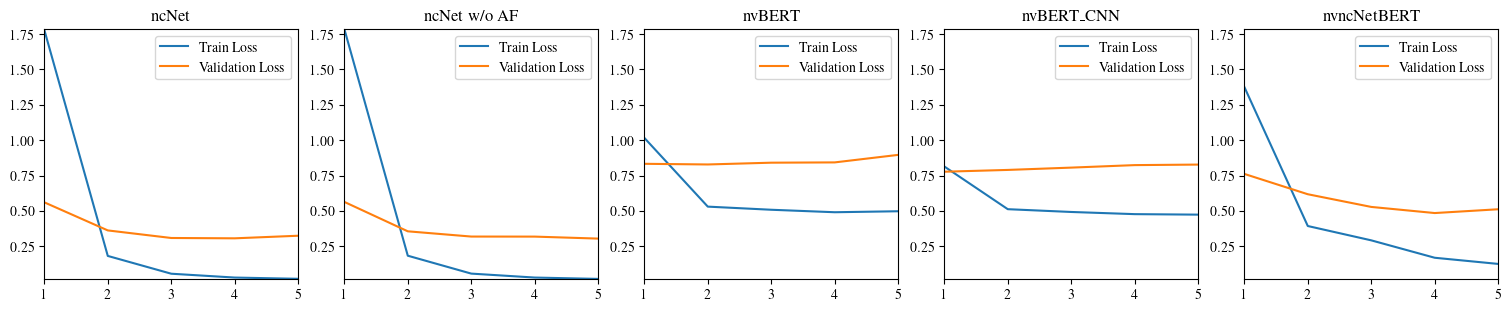

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3), layout='constrained')
axs_list = [a for a in axs.flat]
for i, (k, v) in enumerate(new_res_map.items()):
    axs_list[i].plot([int(i+1) for i in range(len(v[0]))], v[0], label = "Train Loss")
    axs_list[i].plot([int(i+1) for i in range(len(v[1]))], v[1], label = "Validation Loss")
    axs_list[i].title.set_text(k)
    axs_list[i].legend()
    axs_list[i].set_xlim([1, 5])
    axs_list[i].set_ylim([min_loss, max_loss])
    
for ax in axs_list[i+1:]:
    fig.delaxes(ax)
    
plt.savefig('loss_figure.png')